# **ANÁLISE DE REDES**
## Atividade 01 - Prática com PyVis e Streamlit
# **Autores**
### José Alex
### Fabricio Cruz

### **Sobre o dataset:** O OpenFlights/Airline Route Mapper Route Database mapeou 59.036 rotas entre 3.209 aeroportos em 531 companhias aéreas em todo o mundo em janeiro de 2012. Este conjunto de dados permite explorar e analisar várias informações sobre rotas de voo. Segue aqui o link do dataset disponível no Kaggle: <https://www.kaggle.com/datasets/open-flights/flight-route-database>

### Os nós são aeroportos nomeados com o código aeroportuário IATA que é uma sigla composta por três letras, utilizada para designar os aeroportos em todo o mundo. É definido pela Associação Internacional de Transportes Aéreos, que tem sede em Toronto, no Canadá. Já as arestas são as conexões entre um aeroporto e outro, representam as linhas aéreas conectando origem e destino de viagens.
<p align="center">
    <img src="assets/atvd2_routes.png" align="center" width="600px">
</p>

## **Instalando pyvis**

In [2]:
!pip install pyvis
!pip install scipy


You should consider upgrading via the 'C:\Users\alexa\Desktop\Nova pasta\projeto\network_analysis_pyvis_streamlit\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\alexa\Desktop\Nova pasta\projeto\network_analysis_pyvis_streamlit\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## **Importando bibliotecas e dataset routes R**

In [3]:
from pyvis.network import Network
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import collections

got_data = pd.read_csv("https://raw.githubusercontent.com/pupimvictor/NetworkOfThrones/master/stormofswords.csv")
routes_data = pd.read_csv("assets/routes.csv")

R = nx.from_pandas_edgelist(routes_data, source = "Source", target = "Target", create_using=nx.DiGraph())

### Filtrando o grafo para obter um subgrafo fortemente conectado chamado R_Sub para executar alguns comandos exigidos.

In [12]:
# Check if there is any node left with degree d
def check(h, d):
    f = 0  # there is no node of deg <= d
    for i in h.nodes():
        if (h.degree(i) <= d):
            f = 1
            break
    return f


# Find list of nodes with particular degree
def find_nodes(h, it):
    set1 = []
    for i in h.nodes():
        if (h.degree(i) <= it):
            set1.append(i)
    return set1


def remove_nodes_with_degree_equals(g, degree):
    # Copy the graph
    h = g.copy()
    it = degree

    # Bucket being filled currently
    tmp = []

    # list of lists of buckets
    buckets = []
    while (1):
        flag = check(h, it)
        if (flag == 0):
            it += 1
            buckets.append(tmp)
            tmp = []
        if (flag == 1):
            node_set = find_nodes(h, it)
            for each in node_set:
                # print(each)
                h.remove_node(each)
                tmp.append(each)
        if (h.number_of_nodes() == 0):
            buckets.append(tmp)
            break
    g.remove_nodes_from(buckets[0])

R_Sub = R.copy()
print("Quantidade de nós inicial {}".format(len(R_Sub.nodes())))
print("R_Sub {} fortemente conectado".format("é" if nx.is_strongly_connected(R_Sub) else "não é"))
# R_Sub vai ser modificado para perder nós até ficar fortemente conectado
remove_nodes_with_degree_equals(R_Sub, 4)
print("Quantidade de nós final {}".format(len(R_Sub.nodes())))
print("R_Sub {} fortemente conectado".format("é" if nx.is_strongly_connected(R_Sub) else "não é"))

Quantidade de nós inicial 3425
R_Sub não é fortemente conectado
Quantidade de nós final 1703
R_Sub é fortemente conectado


## **Exibindo matriz de adjacencia**
Uma matriz de adjacência é uma representação de uma estrutura de dados em forma de matriz bidimensional, onde as linhas e colunas representam os vértices de um grafo.

Essa representação em forma de matriz é útil para visualizar rapidamente as conexões entre os aeroportos e para realizar análises relacionadas à conectividade dos aeroportos e ao fluxo de rotas de voo.

Devido ao dataset ser muito grande a matriz fica resumida no output.


In [24]:
print(nx.adjacency_matrix(R).todense())

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


## **Diâmetro da rede**
O diâmetro de um grafo é definido como o maior caminho mínimo entre quaisquer dois vértices do grafo. Em outras palavras, é a maior distância possível entre dois vértices no grafo.
A periferia de um grafo é definida como o conjunto de vértices que estão a uma distância máxima do centro do grafo. 

Estamos usando o subgrafo R_Sub que foi obtido logo no inicio deste notebook já com esse objetivo de possibilitar certo cálculos

In [14]:
print('diameter: ', nx.diameter(R_Sub))
print('periphery: ', nx.periphery(R_Sub))

diameter:  9
periphery:  ['YAX']


### Esparsidade/Densidade da Rede
A esparsidade em NetworkX refere-se à proporção de arestas presentes em um grafo em relação ao número total de possíveis arestas. Um grafo esparsamente conectado é aquele em que o número de arestas é muito menor do que o número máximo possível de arestas. Por outro lado, um grafo densamente conectado tem um grande número de arestas em relação ao número total possível. Podemos calcular essa métrica através do comando nx.density(R), que retorna um valor no intervalo de 0 à 1, quanto maior o valor mais denso ele é e quanto menor mais esparso é.

<img src="assets/density.jpg" width="300px">

In [13]:
density = nx.density(R)
print("Densidade de R: ", density)
print("Densidade baixa indica que o grafo é muito esparso")

Densidade de R:  0.003205795074698138
Densidade baixa indica que o grafo é muito esparso


## **Histograma de distribuição empírica de grau**

 ...]

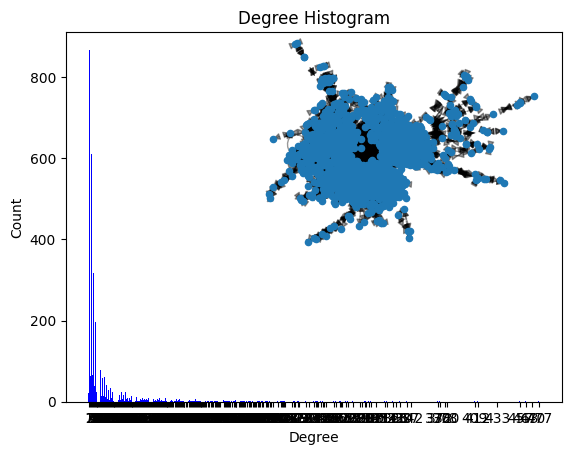

In [10]:
degree_sequence = sorted([d for n, d in R.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.axes([0.4, 0.4, 0.5, 0.5])
pos = nx.spring_layout(R_Sub)
plt.axis('off')
nx.draw_networkx_nodes(R_Sub, pos, node_size=20)
nx.draw_networkx_edges(R_Sub, pos, alpha=0.4)

## **Coeﬁciente de clustering local para nós escolhidos.**
O coeficiente de clusterização local é uma medida que quantifica o grau de agrupamento ou clusterização dos vizinhos de determinado nó. Não é um valor do nó, mas sim dos seus vizinhos.

In [11]:
print('Clusterização')
print('Aeroporto Santos Dumont (SDU): ', nx.clustering(R, 'SDU'))
print('Aeroporto de Guarulhos (GRU): ', nx.clustering(R, 'GRU'))
print('Ambos os nós possuem valores de clusterização baixo que indica que os seus nós adjacentes não se conectam muito entre si.\n')

Clusterização
Aeroporto Santos Dumont (SDU):  0.39869281045751637
Aeroporto de Guarulhos (GRU):  0.17031927232769672
Ambos os nós possuem valores de clusterização baixo que indica que os seus nós adjacentes não se conectam muito entre si.



## **Coeﬁciente de clustering global**
Mede o grau com que os nós de um grafo tendem a agrupar-se. O clustering global é uma média dos valores de clustering locais.

In [16]:
print('Clusterização global: ', nx.average_clustering(R))

Clusterização global:  0.4692087972063501


## **Componentes Conectados Fortemente**
Um componente é fortemente conectado, quando em um
subgrafo todos os nós se acessam.

In [17]:
print('O grafo R {} fortemente conectado!'.format('é' if nx.is_strongly_connected(R) else 'não é'))
print('Quantidade de nós de R: {}'.format(len(R.nodes())))
print('Quantidade de componentes fortemente conectados: {}\n'.format(nx.number_strongly_connected_components(R)))

print('O subgrafo R_Sub {} fortemente conectado!'.format('é' if nx.is_strongly_connected(R_Sub) else 'não é'))
print('Quantidade de nós de R_Sub: {}'.format(len(R_Sub.nodes())))
print('Quantidade de componentes fortemente conectados: {}'.format(nx.number_strongly_connected_components(R_Sub)))

O grafo R não é fortemente conectado!
Quantidade de nós de R: 3425
Quantidade de componentes fortemente conectados: 44

O subgrafo R_Sub é fortemente conectado!
Quantidade de nós de R_Sub: 1703
Quantidade de componentes fortemente conectados: 1


## **Componentes Conectados Fracamente.**
Os componentes conectados fracamente (weakly connected components) em um grafo direcionado referem-se a grupos de nós que podem ser alcançados uns dos outros por meio de uma sequência de arestas direcionadas, independentemente do sentido dessas arestas. No NetworkX, você pode encontrar os componentes conectados fracamente em um grafo direcionado usando a função nx.weakly_connected_components()

In [18]:
print('O grafo {} fracamente conectado!'.format('é' if nx.is_weakly_connected(R) else 'não é'))
print('Quantidade de nós de R: {}'.format(len(R.nodes())))
print('Quantidade de nós fracamente conectados: {}'.format(nx.number_weakly_connected_components(R)))

O grafo não é fracamente conectado!
Quantidade de nós de R: 3425
Quantidade de nós fracamente conectados: 8


## **Eigenvector centrality**
Centralidade de autovetor é uma medida da influência de um nó numa rede. Ele atribui pontuações relativas a todos os nós da rede, baseada no conceito de que as ligações para os nós de alta pontuação contribuem mais para a pontuação do nó em questão do que ligações iguais a nós baixa pontuação. O sistema de PageRank do Google é uma variante da medida de centralidade de autovetor.
A centralidade de autovetor de um nó é calculada levando em consideração não apenas o número de conexões que o nó possui, mas também a importância dos nós aos quais ele está conectado. 

In [ ]:
print('Grau de centralidade do autovetor: ', nx.eigenvector_centrality(R))

## **Degree centrality**
A centralidade de grau é uma medida utilizada em análise de redes para determinar a importância de um nó com base no número de conexões que ele possui na rede. Essa medida busca identificar os nós que possuem um maior número de conexões, ou seja, um maior grau.

In [ ]:
print('Grau de centralidade: ', nx.degree_centrality(R))

## **Closeness centrality**
A centralidade de proximidade é uma medida utilizada em análise de redes para determinar a importância de um nó em uma rede com base em sua proximidade com outros nós. Essa medida busca identificar os nós que estão mais próximos de todos os outros nós na rede.

In [ ]:
print('Grau de centralidade de proximidade: ', nx.closeness_centrality(R))

## **Betweenness centrality**
Centralidade de intermediação quantifica o número de vezes que um nó age como ponte ao longo do caminho mais curto entre dois outros nós. Foi introduzido por Linton Freeman como uma medida para quantificar o controle de um ser humano sobre a comunicação entre outros seres humanos numa rede social.

In [ ]:
print('Grau de centralidade de intermediação do caminho mais curto: ', nx.betweenness_centrality(R))

## **Assortatividade geral da rede**
Assortatividade refere-se à tendência de nós semelhantes se conectarem uns aos outros com maior probabilidade do que se conectarem a nós diferentes. Em outras palavras, é a tendência dos nós de uma rede se ligarem a outros nós com características semelhantes. Redes dissortativas são o oposto de redes assortativas. Enquanto nas redes assortativas nós semelhantes têm maior probabilidade de se conectarem, nas redes dissortativas nós com características diferentes tendem a se conectar mais frequentemente.

In [23]:
print('Coeficiente de assortatividade da rede: ', nx.degree_assortativity_coefficient(R))

Coeficiente de assortatividade da rede:  -0.010443191050714293
